[View in Colaboratory](https://colab.research.google.com/github/Leocodefocus/project/blob/master/LARSAlgrithm.ipynb)

In [0]:
import urllib
import numpy as np
from sklearn import datasets,linear_model
from math import sqrt
import matplotlib.pyplot as plot

In [0]:
#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url).read().decode('utf-8')

In [0]:
xList = []
labels = []
names = []

In [8]:
firstLine = True
for line in data.split('\n'):
    print("=================")
    print(line)
    if len(line.strip())==0:
      continue
    if firstLine:
        names = line.strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;


11.4;0.6;0.49;2.7;0.085;10;41;0.9994;3.15;0.63;10.5;6
7.7;0.69;0.05;2.7;0.075;15;27;0.9974;3.26;0.61;9.1;5
8.7;0.31;0.46;1.4;0.059;11;25;0.9966;3.36;0.76;10.1;6
9.8;0.44;0.47;2.5;0.063;9;28;0.9981;3.24;0.65;10.8;6
12;0.39;0.66;3;0.093;12;30;0.9996;3.18;0.63;10.8;7
10.4;0.34;0.58;3.7;0.174;6;16;0.997;3.19;0.7;11.3;6
12.5;0.46;0.49;4.5;0.07;26;49;0.9981;3.05;0.57;9.6;4
9;0.43;0.34;2.5;0.08;26;86;0.9987;3.38;0.62;9.5;6
9.1;0.45;0.35;2.4;0.08;23;78;0.9987;3.38;0.62;9.5;5
7.1;0.735;0.16;1.9;0.1;15;77;0.9966;3.27;0.64;9.3;5
9.9;0.4;0.53;6.7;0.097;6;19;0.9986;3.27;0.82;11.7;7
8.8;0.52;0.34;2.7;0.087;24;122;0.9982;3.26;0.61;9.5;5
8.6;0.725;0.24;6.6;0.117;31;134;1.0014;3.32;1.07;9.3;5
10.6;0.48;0.64;2.2;0.111;6;20;0.997;3.26;0.66;11.7;6
7;0.58;0.12;1.9;0.091;34;124;0.9956;3.44;0.48;10.5;5
11.9;0.38;0.51;2;0.121;7;20;0.9996;3.24;0.76;10.4;6
6.8;0.77;0;1.8;0.066;34;52;0.9976;3.62;0.68;9.9;5
9.5;0.56;0.33;2.4;0.089;35;67;0.9972;3.28;0.73;11.8;7
6.6;0.84;0.03;2.3;0.059;32;48;0.9952;3.52;0.56;12.3;


6.7;0.41;0.43;2.8;0.076;22;54;0.99572;3.42;1.16;10.6;6
10.2;0.41;0.43;2.2;0.11;11;37;0.99728;3.16;0.67;10.8;5
10.6;0.36;0.57;2.3;0.087;6;20;0.99676;3.14;0.72;11.1;7
8.8;0.45;0.43;1.4;0.076;12;21;0.99551;3.21;0.75;10.2;6
8.5;0.32;0.42;2.3;0.075;12;19;0.99434;3.14;0.71;11.8;7
9;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;5
9;0.785;0.24;1.7;0.078;10;21;0.99692;3.29;0.67;10;5
8.5;0.44;0.5;1.9;0.369;15;38;0.99634;3.01;1.1;9.4;5
9.9;0.54;0.26;2;0.111;7;60;0.99709;2.94;0.98;10.2;5
8.2;0.33;0.39;2.5;0.074;29;48;0.99528;3.32;0.88;12.4;7
6.5;0.34;0.27;2.8;0.067;8;44;0.99384;3.21;0.56;12;6
7.6;0.5;0.29;2.3;0.086;5;14;0.99502;3.32;0.62;11.5;6
9.2;0.36;0.34;1.6;0.062;5;12;0.99667;3.2;0.67;10.5;6
7.1;0.59;0;2.2;0.078;26;44;0.99522;3.42;0.68;10.8;6
9.7;0.42;0.46;2.1;0.074;5;16;0.99649;3.27;0.74;12.3;6
7.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;6
7.6;0.36;0.31;1.7;0.079;26;65;0.99716;3.46;0.62;9.5;6
6.5;0.61;0;2.2;0.095;48;59;0.99541;3.61;0.7;11.5;6
6.5;0.88;0.03;5.6;0.079;23;47;0.99572;

In [9]:
print(labels)
print(names)
print(xList)

[5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 7.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 4.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 6.0, 7.0, 4.0, 5.0, 5.0, 4.0, 6.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 6.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 4.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 4.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 6.0, 5.0, 4.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 7.0, 4.0,

In [0]:
#Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

In [0]:
#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

In [0]:
#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#initialize a vector of coefficients beta
beta = [0.0] * ncols

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

In [0]:
#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat

    #calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * ncols

    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)]) / nrows

    iStar = 0
    corrStar = corr[0]

    for j in range(1, (ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]

    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    nzBeta = [index for index in range(ncols) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

['"alcohol"', '"volatile acidity"', '"sulphates"', '"total sulfur dioxide"', '"chlorides"', '"fixed acidity"', '"pH"', '"free sulfur dioxide"', '"citric acid"', '"residual sugar"', '"density"']


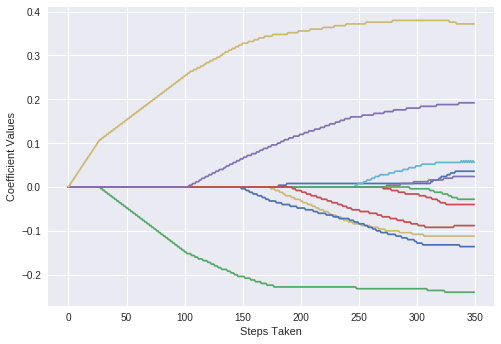

In [14]:
nameList = [names[nzList[i]] for i in range(len(nzList))]

print(nameList)
for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()

In [0]:
nxval = 10

In [0]:
nSteps = 350
setpSize = 0.004

In [0]:
errors = []
for i in range(nSteps):
  b = []
  errors.append(b)

Minimum Mean Square Error 0.6494495844086484
Index of Minimum Mean Square Error 285


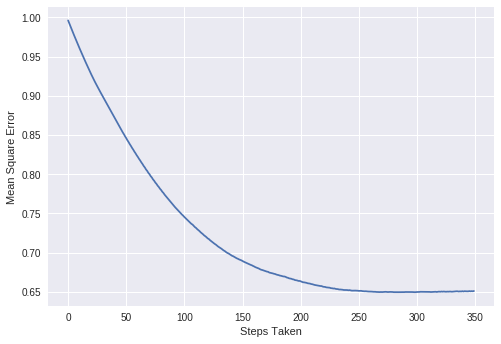

In [18]:
for ixval in range(nxval):
  idxTest = [a for a in range(nrows) if a%nxval == ixval%nxval]
  idxTrain = [a for a in range(nrows) if a%nxval != ixval%nxval]
  
  xTrain = [xNormalized[r] for r in idxTrain]
  xTest = [xNormalized[r] for r in idxTest]
  
  labelTrain = [labelNormalized[r] for r in idxTrain]
  labelTest = [labelNormalized[r] for r in idxTest]
  
  nrowsTrain = len(idxTrain)
  nrowsTest = len(idxTest)
  
  beta = [0.0] * ncols
  
  betaMat = []
  betaMat.append(list(beta))
  
  for iStep in range(nSteps):
    residuals = [0.0]*nrows
    for j in range(nrowsTrain):
      labelsHat = sum([xTrain[j][k] * beta[k] for k in range(ncols)])
      residuals[j] = labelTrain[j] - labelsHat
    
    corr = [0.0] * ncols
    
    for j in range(ncols):
      corr[j] = sum([xTrain[k][j] * residuals[k] for k in range(nrowsTrain)]) / nrowsTrain
    
    iStar = 0
    corrStar = corr[0]
    
    for j in range(1,(ncols)):
      if abs(corrStar) < abs(corr[j]):
        iStar = j;
        corrStar = corr[j]
        
    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))
    
    for j in range(nrowsTest):
      labelsHat = sum([xTest[j][k] * beta[k] for k in range(ncols)])
      err = labelTest[j] - labelsHat
      errors[iStep].append(err)
      
cvCurve = []
for errVect in errors:
  mse = sum([x*x for x in errVect])/len(errVect)
  cvCurve.append(mse)

minMse = min(cvCurve)
minPt = [i for i in range(len(cvCurve)) if cvCurve[i] == minMse][0]
print("Minimum Mean Square Error", minMse)
print("Index of Minimum Mean Square Error", minPt)

xaxis = range(len(cvCurve))
plot.plot(xaxis, cvCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Mean Square Error"))
plot.show()